### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [24]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style="darkgrid")
filterwarnings("ignore")

In [25]:
x = load_npz("data/x.npz")
y = np.load("data/y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [27]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [29]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 460 ms, sys: 1.84 ms, total: 462 ms
Wall time: 462 ms
Train ROC-AUC 0.9867
Valid ROC-AUC 0.9423
Test ROC-AUC 0.9423


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Max Depth: 1, Train ROC-AUC: 0.9131, Test ROC-AUC: 0.9118
Max Depth: 3, Train ROC-AUC: 0.9442, Test ROC-AUC: 0.9403
Max Depth: 5, Train ROC-AUC: 0.9592, Test ROC-AUC: 0.9530
Max Depth: 7, Train ROC-AUC: 0.9695, Test ROC-AUC: 0.9587
Max Depth: 9, Train ROC-AUC: 0.9766, Test ROC-AUC: 0.9615
Max Depth: 11, Train ROC-AUC: 0.9823, Test ROC-AUC: 0.9611
Max Depth: 13, Train ROC-AUC: 0.9867, Test ROC-AUC: 0.9608
Max Depth: 15, Train ROC-AUC: 0.9892, Test ROC-AUC: 0.9599
Max Depth: 17, Train ROC-AUC: 0.9913, Test ROC-AUC: 0.9561
Max Depth: 19, Train ROC-AUC: 0.9926, Test ROC-AUC: 0.9584
Max Depth: 21, Train ROC-AUC: 0.9933, Test ROC-AUC: 0.9592
Max Depth: 23, Train ROC-AUC: 0.9940, Test ROC-AUC: 0.9583
Max Depth: 25, Train ROC-AUC: 0.9944, Test ROC-AUC: 0.9571
Max Depth: 27, Train ROC-AUC: 0.9948, Test ROC-AUC: 0.9564
Max Depth: 29, Train ROC-AUC: 0.9947, Test ROC-AUC: 0.9573


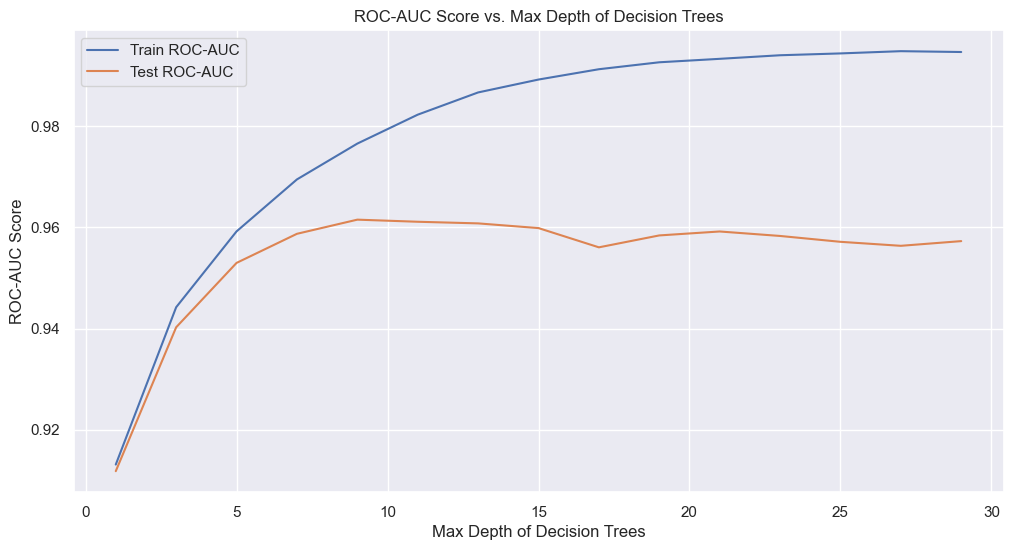

In [30]:
from sklearn.tree import DecisionTreeRegressor

results = {
    'train': [],
    'test': [],
    'depth': []
}

depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(
        base_model_class=DecisionTreeRegressor,
        base_model_params={'max_depth': depth},
        n_estimators=50,  # keeping it moderate for the sake of runtime
        learning_rate=0.1,
        subsample=0.3,
        early_stopping_rounds=5,
        plot=False
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_auc = boosting.score(x_train, y_train)
    test_auc = boosting.score(x_test, y_test)

    results['train'].append(train_auc)
    results['test'].append(test_auc)
    results['depth'].append(depth)

    print(f'Max Depth: {depth}, Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {test_auc:.4f}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(results['depth'], results['train'], label='Train ROC-AUC')
plt.plot(results['depth'], results['test'], label='Test ROC-AUC')
plt.xlabel('Max Depth of Decision Trees')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score vs. Max Depth of Decision Trees')
plt.legend()
plt.grid(True)
plt.show()


**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

На основании предоставленных результатов и оценок ROC-AUC, модель с глубиной деревьев 9 показала наивысший результат на тестовой выборке с ROC-AUC равным 0.9615.

Объяснение:

Недообучение и переобучение:

Недообучение: при малой глубине деревьев модель слишком проста и не улавливает основные закономерности (низкие ROC-AUC).
Переобучение: при большой глубине деревьев модель начинает подгоняться под шум в данных, что приводит к снижению качества на тестовой выборке.

Оптимальная глубина:

Глубина 9 обеспечивает лучший баланс между сложностью модели и её способностью обобщать на новые данные, что подтверждается наивысшим ROC-AUC на тестовой выборке.

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

[I 2024-06-11 18:17:16,756] A new study created in memory with name: no-name-d8485201-034f-4017-b6ff-c290d57f8a2b
[I 2024-06-11 18:17:19,443] Trial 0 finished with value: 0.9610022534115736 and parameters: {'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 4, 'n_estimators': 46, 'learning_rate': 0.07706981232948264, 'subsample': 0.8285510016442893}. Best is trial 0 with value: 0.9610022534115736.
[I 2024-06-11 18:17:22,574] Trial 1 finished with value: 0.9634352515928302 and parameters: {'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 17, 'n_estimators': 81, 'learning_rate': 0.20205452768539264, 'subsample': 0.4194795041102385}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:30,594] Trial 2 finished with value: 0.9572408481368366 and parameters: {'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 8, 'n_estimators': 81, 'learning_rate': 0.14928115117651722, 'subsample': 0.9581950221426463}. Best is trial 1 with value: 0.9634352515

Early stopping on iteration 71


[I 2024-06-11 18:17:38,715] Trial 4 finished with value: 0.960484083136017 and parameters: {'max_depth': 22, 'min_samples_split': 17, 'min_samples_leaf': 11, 'n_estimators': 66, 'learning_rate': 0.1315080765099642, 'subsample': 0.9495692439416312}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:40,949] Trial 5 finished with value: 0.9602778063743714 and parameters: {'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 4, 'n_estimators': 34, 'learning_rate': 0.22310054970043702, 'subsample': 0.6904154205000724}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:41,478] Trial 6 finished with value: 0.9528937846257086 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 15, 'n_estimators': 15, 'learning_rate': 0.018831962946553475, 'subsample': 0.86678611710685}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:44,103] Trial 7 finished with value: 0.9575752376376926 and parameters: {'max_depth': 28,

Early stopping on iteration 91


[I 2024-06-11 18:17:49,001] Trial 11 finished with value: 0.9628778086620988 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 20, 'n_estimators': 99, 'learning_rate': 0.2270897091097539, 'subsample': 0.12970354335563206}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:51,037] Trial 12 finished with value: 0.9622395326935322 and parameters: {'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 20, 'n_estimators': 67, 'learning_rate': 0.2775395654024271, 'subsample': 0.41960534536283334}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:52,969] Trial 13 finished with value: 0.9621865336734421 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 16, 'n_estimators': 97, 'learning_rate': 0.1949116741262805, 'subsample': 0.27670570269295913}. Best is trial 1 with value: 0.9634352515928302.
[I 2024-06-11 18:17:56,210] Trial 14 finished with value: 0.9619215385729918 and parameters: {'max_dept

Early stopping on iteration 75


[I 2024-06-11 18:19:16,218] Trial 41 finished with value: 0.9617026793101738 and parameters: {'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 19, 'n_estimators': 70, 'learning_rate': 0.11897501200663571, 'subsample': 0.5309746228934905}. Best is trial 26 with value: 0.9634893944766634.
[I 2024-06-11 18:19:19,575] Trial 42 finished with value: 0.9621167579851222 and parameters: {'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 16, 'n_estimators': 76, 'learning_rate': 0.06516018886788223, 'subsample': 0.5907502599113471}. Best is trial 26 with value: 0.9634893944766634.
[I 2024-06-11 18:19:23,563] Trial 43 finished with value: 0.9608905360526787 and parameters: {'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 1, 'n_estimators': 86, 'learning_rate': 0.11028599389623578, 'subsample': 0.44661287086112517}. Best is trial 26 with value: 0.9634893944766634.
[I 2024-06-11 18:19:28,836] Trial 44 finished with value: 0.9618490938692716 and parameters: {'max_

Best parameters: {'max_depth': 24, 'min_samples_split': 13, 'min_samples_leaf': 10, 'n_estimators': 60, 'learning_rate': 0.16902476376666278, 'subsample': 0.4408853541937785}


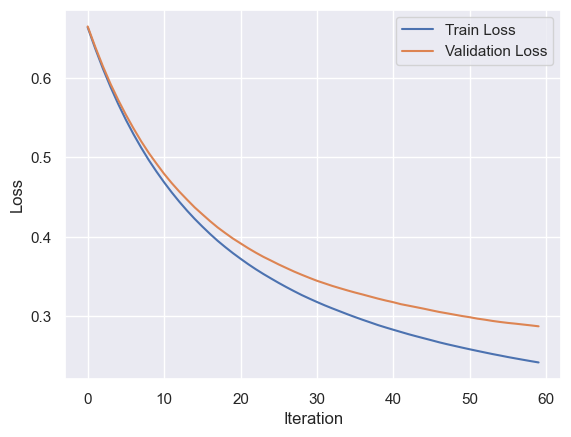

Train ROC-AUC: 0.9817
Valid ROC-AUC: 0.9614
Test ROC-AUC: 0.9612


In [31]:
import optuna
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
    base_model_params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)

    boosting = Boosting(
        base_model_class=DecisionTreeRegressor,
        base_model_params=base_model_params,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=10,
        plot=False
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)

    valid_auc = boosting.score(x_valid, y_valid)
    return valid_auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best parameters: {best_params}")

final_boosting = Boosting(
    base_model_class=DecisionTreeRegressor,
    base_model_params={
        'max_depth': best_params['max_depth'],
        'min_samples_split': best_params['min_samples_split'],
        'min_samples_leaf': best_params['min_samples_leaf'],
    },
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=True
)

final_boosting.fit(x_train, y_train, x_valid, y_valid)
print(f'Train ROC-AUC: {final_boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC: {final_boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC: {final_boosting.score(x_test, y_test):.4f}')

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
